# Teaching Data Science

Miles Berry

University of Roehampton

13 June 2020

# Find motivating contexts for teaching computer science

In [1]:
from random import randint
import matplotlib.pyplot as plt
from statistics import mean,median,mode,stdev


| |
|-|
|Foundations|
|Applications|
|Implications|

|            |                      |
|------------|----------------------|
|Foundations |Computer science      |
|Applications|Information technology|
|Implications|Digital literacy      |


| | |
|-|-|
|Foundations|Probabilility and statistics|
|Applications|Using software, writing code|
|Implications|Question everything, trust no one|

## Data science in CSTA standards

**5-7 year olds**: Collect and present the same data in various visual formats. Identify and describe patterns in data visualizations, such as charts or graphs, to make
predictions.

**8-11 year olds**: Organize and present collected data visually to highlight relationships and support a claim. Use data to highlight or propose cause-and-effect relationships, predict outcomes, or communicate an idea.

**11-14 year olds**: Collect data using computational tools and transform the data to make it more useful and
reliable. Refine computational models based on the data they have generated.


## Data science in CSTA standards

**14-16 year olds**: Create interactive data visualizations using software tools to help others better understand
real-world phenomena. Create computational models that represent the relationships among different elements of data collected from a phenomenon or process.

**16-18 year olds**: Use data analysis tools and techniques to identify patterns in data representing complex systems. Select data collection tools and techniques to generate data sets that support a claim or communicate information. Evaluate the ability of models and simulations to test and support the refinement of hypotheses.


## Introducing probability and statistics: dice rolling

Let's start by creating a function to roll a dice, and then rolling lots of dice lots of times.

In [2]:
def roll(dice=1,sides=6):
  score = 0
  for i in range(dice):
    score += randint(1,sides)
  return score

def rolls(dice=1,sides=6,times=1):
  scores = []
  for i in range(times):
    scores.append(roll(dice,sides))
  return scores

example = rolls(2,6,50)

example[:10]


[6, 12, 5, 6, 8, 8, 8, 12, 6, 5]

In [172]:
def mymean(data):
    total = 0
    count = 0
    for i in data:
        total += i
        count += 1
    return total/count


mymean(example)

6.5

Other approaches to calculating the mean:

Using higher order functions:

```python
from functools import reduce

def mymean(data):
    return((reduce(lambda a, b: a + b, data) / len(data)))

```
Using sum:
```python
def mymean(data):
    return sum(data)/len(data)
```
Using the mean function!
```python
from statistics import mean
```


In [4]:
def freqtable(data):
    freqtable = {}
    for i in data:
        if i in freqtable.keys():
            freqtable[i] += 1
        else:
            freqtable[i] = 1
    return(freqtable)


sorted(freqtable(example).items())

[(2, 1),
 (3, 1),
 (4, 3),
 (5, 9),
 (6, 13),
 (7, 9),
 (8, 7),
 (9, 1),
 (10, 1),
 (11, 3),
 (12, 2)]

<BarContainer object of 11 artists>

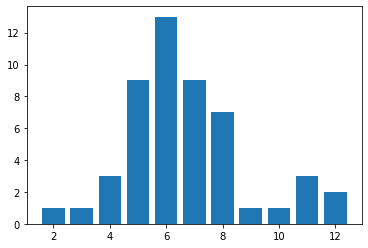

In [5]:
plt.bar(freqtable(example).keys(),freqtable(example).values())

In [6]:
def mymode(data):
    mode = 0
    max = 0
    freqs = freqtable(data)
    for i in freqs.keys():
        if freqs[i]>max:
            max=freqs[i]
            mode = i
    return mode

mymode(example)

6

In [7]:
def quicksort(data):
    if len(data)==0:
        return data
    else:
        lower = [x for x in data[1:] if x < data[0]]
        upper = [x for x in data[1:] if x >= data[0]]
        return quicksort(lower) + [data[0]] + quicksort(upper)

def mymedian(data):
    l = len(data)
    if l % 2 == 1:
        return quicksort(data)[l // 2]
    else:
        return quicksort(data)[(l+1)//2]
    
mymedian(example)

6

mean = 6.7
median =  6.0
mode = 6
standard deviation = 2.168889492955568


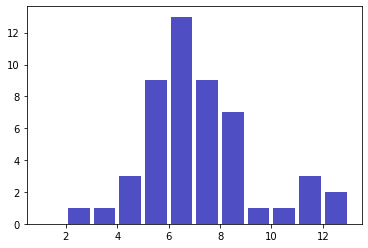

In [8]:
plt.hist(example, bins=range(1,14), color='#0504aa',
                            alpha=0.7, rwidth=0.85)

print('mean =',mean(example))
print('median = ',median(example))
print('mode =',mode(example))
print('standard deviation =',stdev(example))

## Working with historical weather data

For this, we'll import some of Python's libraries rather than creating all this ourselves!

In [140]:
import pandas as pd
import requests
import datetime
import seaborn as sns
sns.set()
import scipy.stats


We'll also download the historical (month by month) weather data for the Heathrow weather station from the [UK Met Office](https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data) website

In [3]:
url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt'
raw = requests.get(url, allow_redirects=True)
open('data.txt','wb').write(raw.content)

45992

What follows is unpleasant.

Transforming the data into a usable format is non-trivial, requires attention to detail and is specific to the particular use case.

In general, do this for pupils, or have them do this in Excel where they can see what they're doing.

In [184]:
dataset = pd.read_csv("data.txt", skiprows=[0,1,2,3,4,5],
                      names=['yyyy', 'mm', 'tmax', 'tmin', 'af', 'rain', 'sun', 'notes'],
                      delim_whitespace=True, warn_bad_lines=True, error_bad_lines=False, na_values='---')
dataset['sun'] = dataset['sun'].str.replace(r'#', '')
dataset = dataset.drop([0])
dataset['date'] = dataset.apply(lambda x: datetime.date(int(x['yyyy']), int(x['mm']), 1), axis=1)
dataset.index = dataset['date']
dataset.index = pd.to_datetime(dataset.index)
dataset.index = dataset.index.to_period('M')
dataset = dataset.drop(['date'], axis=1)
dataset = dataset.drop(['notes'], axis=1)
dataset['mm'] = dataset['mm'].astype('int')
dataset['tmax'] = dataset['tmax'].astype('float')
dataset['tmin'] = dataset['tmin'].astype('float')
dataset['af'] = dataset['af'].astype('float', errors='ignore')
dataset['rain'] = dataset['rain'].astype('float')
dataset['sun'] = dataset['sun'].astype('float', errors='ignore')
dataset[:3]

,yyyy,mm,tmax,tmin,af,rain,sun
date,,,,,,,
1948-01,1948,1,8.9,3.3,NaN,85.0,NaN
1948-02,1948,2,7.9,2.2,NaN,26.0,NaN
1948-03,1948,3,14.2,3.8,NaN,14.0,NaN


In [185]:
dataset[dataset.rain<=3]

,yyyy,mm,tmax,tmin,af,rain,sun
date,,,,,,,
1956-02,1956,2,2.9,-3.6,22.0,2.3,NaN
1959-02,1959,2,7.4,1.2,7.0,2.4,54.8
1978-10,1978,10,17.1,8.4,0.0,1.6,98.4
1993-02,1993,2,7.2,2.5,2.0,2.4,51.0
1995-08,1995,8,27.0,15.6,0.0,0.3,295.3
2011-04,2011,4,19.7,8.6,0.0,2.4,218.0
2018-06,2018,6,24.2,13.1,0.0,0.4,234.5
2020-05,2020,5,21.1,9.1,0.0,2.0,308.6


In [151]:
coldmonths=dataset[(dataset.tmin < 0) | (dataset.af > 15)]

coldmonths[-10:]

,tmax,tmin,af,rain,sun,notes,season
date,,,,,,,
1981-02,7.1,-0.1,16.0,11.9,71.6,NaN,winter
1981-12,4.4,-1.5,17.0,85.3,47.0,NaN,winter
1983-02,5.5,-0.5,19.0,31.0,85.3,NaN,winter
1985-01,4.1,-1.8,20.0,41.3,46.9,NaN,winter
1986-02,1.7,-2.7,24.0,14.5,61.9,NaN,winter
1987-01,3.6,-1.0,18.0,11.1,54.4,NaN,winter
1991-02,5.4,-1.3,16.0,34.7,48.5,NaN,winter
1996-02,6.8,0.1,17.0,49.0,100.3,NaN,winter
2010-01,4.5,-0.3,15.0,51.8,51.3,NaN,winter


In [93]:
dataset.dtypes

yyyy      object
mm         int64
tmax     float64
tmin     float64
af       float64
rain     float64
sun      float64
notes     object
dtype: object

In [174]:
winter = dataset.loc[(dataset.index.month==12)|(dataset.index.month==1)|(dataset.index.month==2)]
winter

,yyyy,mm,tmax,tmin,af,rain,sun
date,,,,,,,
1948-01,1948,1,8.9,3.3,NaN,85.0,NaN
1948-02,1948,2,7.9,2.2,NaN,26.0,NaN
1948-12,1948,12,8.8,3.8,NaN,63.0,NaN
1949-01,1949,1,8.5,1.8,9.0,23.0,NaN
1949-02,1949,2,10.4,0.6,11.0,27.0,NaN
...,...,...,...,...,...,...,...
2019-01,2019,1,7.6,2.0,9.0,33.2,56.4
2019-02,2019,2,12.4,3.3,3.0,34.2,120.2
2019-12,2019,12,10.2,4.0,3.0,89.6,56.2


In [81]:
summer = dataset.loc[(dataset.index.month==6)|(dataset.index.month==7)|(dataset.index.month==8)]
summer

,yyyy,mm,tmax,tmin,af,rain,sun,notes
date,,,,,,,,
1948-06,1948,6,19.1,10.3,NaN,67.0,NaN,NaN
1948-07,1948,7,21.7,12.0,NaN,21.0,NaN,NaN
1948-08,1948,8,20.8,11.7,NaN,67.0,NaN,NaN
1949-06,1949,6,22.0,10.5,0.0,9.0,NaN,NaN
1949-07,1949,7,25.1,12.9,0.0,46.5,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-08,2018,8,24.5,14.5,0.0,48.2,182.1,NaN
2019-06,2019,6,21.8,11.9,0.0,81.8,170.1,Provisional
2019-07,2019,7,25.5,14.9,0.0,50.8,194.5,Provisional


In [18]:
summer.tmax.mean()

22.139631336405532

In [95]:
winter.tmax.mean()

8.03394495412844

In [21]:
winter.describe()

,tmax,tmin,af,rain,sun
count,218.000000,218.000000,215.000000,218.000000,191.000000
mean,8.033945,2.122936,8.311628,50.164220,58.410471
std,1.939510,1.821638,5.433593,27.514342,19.655092
min,0.800000,-4.600000,0.000000,2.300000,18.500000
25%,6.925000,1.000000,5.000000,29.825000,45.500000
50%,8.150000,2.100000,7.000000,47.750000,56.600000
75%,9.400000,3.400000,11.500000,69.450000,67.150000
max,13.700000,8.900000,28.000000,162.400000,130.000000


In [22]:
summer.describe()

,tmax,tmin,af,rain,sun
count,217.000000,217.000000,214.0,217.000000,190.000000
mean,22.139631,12.688479,0.0,50.292627,195.938421
std,2.063909,1.443698,0.0,29.331550,43.170640
min,17.400000,9.000000,0.0,0.300000,101.700000
25%,20.700000,11.700000,0.0,26.900000,164.025000
50%,21.800000,12.700000,0.0,46.500000,190.150000
75%,23.500000,13.600000,0.0,68.800000,225.950000
max,28.300000,16.700000,0.0,150.300000,295.300000


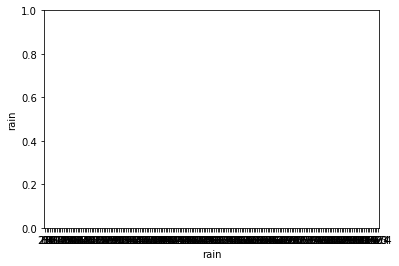

In [30]:
sns.boxplot(winter['rain']summer['rain'])


In [119]:
seasons = {1:'winter',2:'winter',3:'spring',4:'spring',5:'spring',6:'summer',7:'summer',8:'summer',9:'autumn',10:'autumn',11:'autumn',12:'winter'}
dataset['season'] = ((dataset.index.month).map(seasons))
dataset['decade']= dataset['yyyy'].str[:3]+'0s'
dataset

,yyyy,mm,tmax,tmin,af,rain,sun,notes,season,decade
date,,,,,,,,,,
1948-01,1948,1,8.9,3.3,NaN,85.0,NaN,NaN,winter,1940s
1948-02,1948,2,7.9,2.2,NaN,26.0,NaN,NaN,winter,1940s
1948-03,1948,3,14.2,3.8,NaN,14.0,NaN,NaN,spring,1940s
1948-04,1948,4,15.4,5.1,NaN,35.0,NaN,NaN,spring,1940s
1948-05,1948,5,18.1,6.9,NaN,57.0,NaN,NaN,spring,1940s
...,...,...,...,...,...,...,...,...,...,...
2020-02,2020,2,11.1,4.3,1.0,99.8,62.0,Provisional,winter,2020s
2020-03,2020,3,12.0,3.9,1.0,42.8,148.0,Provisional,spring,2020s
2020-04,2020,4,18.2,6.5,1.0,38.2,235.4,Provisional,spring,2020s


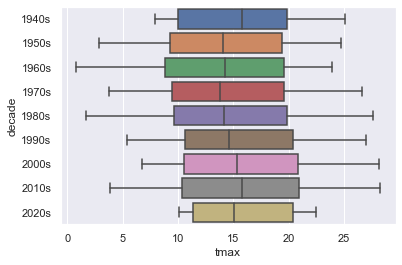

In [142]:
sns.boxplot(dataset.tmax,dataset.decade)

In [ ]:
dataset[season=='spring'].tmax.mean()


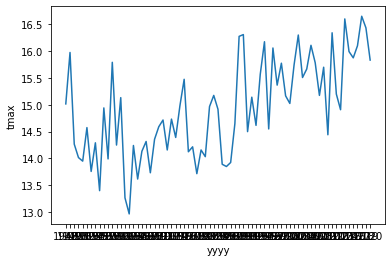

In [139]:
decadetemp = dataset.groupby(['yyyy'],sort=False).tmax.mean()
decadetemp
sns.lineplot(decadetemp.index,decadetemp)

In [124]:
scipy.stats.ttest_ind(dataset[dataset['season']=='winter'].rain,dataset[dataset['season']=='summer'].rain)

Ttest_indResult(statistic=-0.04709142104732515, pvalue=0.9624620762002365)

In [72]:
dataset.groupby([dataset.index.month],sort=False).tmin.mean()

date
1      1.889041
2      1.841096
3      3.323288
4      5.235616
5      8.369863
6     11.382192
7     13.477778
8     13.223611
9     11.076389
10     8.154167
11     4.522222
12     2.645833
Name: tmin, dtype: float64